In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)

In [2]:
df = pd.read_csv('training_data.csv')
df.head()

/var/folders/98/4w5bzj557j733_gyzdw052200000gn/T/ipykernel_17079/767595295.py:1: DtypeWarning: Columns (51) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('training_data.csv')


,financial_active,net_payment_behaviour_tripd,promotion_flag,variable_rate_index,account_status_code,active_12_mths,bank_fico_buckets_20,charge_off_reason_code,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,stmt_balance,prev_balance,net_sales,net_payments,purchase_active,credit_limit_amt,credit_limit_pa,closed,active,charge_off,charge_off_aged,charge_off_bk,principal_amt,principal_amt_chrg_off,total_writeoff_amt,fee_chg_off_reversal_amt,net_finance_charge,non_principal_amount_gross,non_principal_amount_net,non_principal_amount_stmt,aged_writeoff_amt,bankruptcy_writeoff_amt,fc_reversals,fee_reversals,fraud_writeoff_amt,other_writeoff_amt,promo_bal_amt,recovery_amt,writeoff_type_bko,writeoff_type_fraud_kiting,writeoff_type_fraud_synthetic,writeoff_type_deceased,writeoff_type_other,writeoff_type_aged,writeoff_type_settlement,writeoff_type_fraud_other,writeoff_type_repo,writeoff_type_null,writeoff_date,due_account_2,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,due_balance_2,due_balance_3,due_balance_4,due_balance_5,due_balance_6,due_balance_7,due_balance_8,snapshot,mth_code,industry
0,1.0,P,0,0,I 0-6,1.0,581-600,NaN,3,1.0,0.0,0.0,NaN,34.77,1918.32,54.25,0.00,0.0,5900.0,2500.0,0,1,0,0,0,301.97,0.0,0.0,0.0,0.00,1045.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201807,B
1,0.0,P,0,0,I 0-6,1.0,721-740,NaN,159,1.0,0.0,0.0,19.65,0.00,0.00,0.00,0.00,0.0,5000.0,11400.0,0,1,0,0,0,510.16,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1557.24,0.0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201906,C
2,1.0,T,0,0,I 7-12,1.0,761+,NaN,22,1.0,0.0,0.0,19.65,0.00,0.00,0.00,104.00,0.0,3100.0,0.0,0,1,0,0,0,0.00,0.0,0.0,0.0,0.00,261.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201905,A
3,1.0,T,0,1,I 0-6,1.0,761+,NaN,16,1.0,1.0,0.0,NaN,0.00,0.00,0.00,859.57,1.0,700.0,0.0,0,1,0,0,0,0.00,0.0,0.0,0.0,12.08,0.30,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0,0,0,0,0,0,0,0,0,1,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201806,B
4,1.0,P,0,0,A,0.0,721-740,NaN,3,1.0,0.0,2.0,11.65,0.00,0.00,0.00,0.00,0.0,3500.0,0.0,0,1,0,0,0,0.00,0.0,0.0,0.0,0.00,0.00,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,960.00,0.0,0,0,0,0,0,0,0,0,0,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201801,201902,B


In [3]:
df.isnull().sum()

financial_active                       0
net_payment_behaviour_tripd            0
promotion_flag                         0
variable_rate_index                    0
account_status_code                    0
active_12_mths                         0
bank_fico_buckets_20                   0
charge_off_reason_code           5758209
mob                                    0
open_closed_flag                       4
ever_delinquent_flg                    0
nbr_mths_due                           0
variable_rate_margin             4208656
stmt_balance                           0
prev_balance                           0
net_sales                              0
net_payments                           0
purchase_active                        0
credit_limit_amt                       0
credit_limit_pa                        0
closed                                 0
active                                 0
charge_off                             0
charge_off_aged                        0
charge_off_bk   

In [4]:
df['mth_code'] = pd.to_datetime(df['mth_code'], format = '%Y%m', errors = 'coerce')

In [5]:
df['mth_code']

0         2018-07-01
1         2019-06-01
2         2019-05-01
3         2018-06-01
4         2019-02-01
             ...    
5758218   2019-12-01
5758219   2019-12-01
5758220   2019-12-01
5758221   2019-12-01
5758222   2019-12-01
Name: mth_code, Length: 5758223, dtype: datetime64[ns]

In [6]:
df['charge_off'].value_counts()

0    5742525
1      15698
Name: charge_off, dtype: int64

In [7]:
df.groupby(df['mth_code'].dt.strftime('%B'))['charge_off'].sum().sort_values()

mth_code
January       760
February      931
March        1005
April        1071
May          1247
June         1263
July         1306
August       1352
September    1390
October      1669
November     1802
December     1902
Name: charge_off, dtype: int64

In [8]:
df.groupby('mth_code')['charge_off'].sum()

mth_code
2018-01-01       0
2018-02-01      78
2018-03-01     162
2018-04-01     206
2018-05-01     294
2018-06-01     362
2018-07-01     373
2018-08-01     431
2018-09-01     476
2018-10-01     617
2018-11-01     695
2018-12-01     716
2019-01-01     760
2019-02-01     853
2019-03-01     843
2019-04-01     865
2019-05-01     953
2019-06-01     901
2019-07-01     933
2019-08-01     921
2019-09-01     914
2019-10-01    1052
2019-11-01    1107
2019-12-01    1186
Name: charge_off, dtype: int64

In [9]:
df['mth_code'].unique()

array(['2018-07-01T00:00:00.000000000', '2019-06-01T00:00:00.000000000',
       '2019-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2019-02-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2019-01-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2019-07-01T00:00:00.000000000',
       '2019-11-01T00:00:00.000000000', '2018-09-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2019-03-01T00:00:00.000000000',
       '2019-09-01T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2019-04-01T00:00:00.000000000',
       '2018-08-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2019-10-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [10]:
df['mth_code'].min()

Timestamp('2018-01-01 00:00:00')

In [11]:
df['mth_code'].max()

Timestamp('2019-12-01 00:00:00')

In [12]:
df.groupby('mth_code')['net_payment_behaviour_tripd'].count()

mth_code
2018-01-01     19858
2018-02-01     39706
2018-03-01     59462
2018-04-01     79115
2018-05-01     98714
2018-06-01    118195
2018-07-01    137595
2018-08-01    156979
2018-09-01    176303
2018-10-01    195573
2018-11-01    214642
2018-12-01    233739
2019-01-01    252813
2019-02-01    271309
2019-03-01    289615
2019-04-01    307703
2019-05-01    325685
2019-06-01    343615
2019-07-01    361628
2019-08-01    379557
2019-09-01    397415
2019-10-01    415313
2019-11-01    433026
2019-12-01    450663
Name: net_payment_behaviour_tripd, dtype: int64

In [13]:
df1 = df.copy()

In [14]:
df1.dtypes

financial_active                        float64
net_payment_behaviour_tripd              object
promotion_flag                            int64
variable_rate_index                       int64
account_status_code                      object
active_12_mths                          float64
bank_fico_buckets_20                     object
charge_off_reason_code                  float64
mob                                       int64
open_closed_flag                        float64
ever_delinquent_flg                     float64
nbr_mths_due                            float64
variable_rate_margin                    float64
stmt_balance                            float64
prev_balance                            float64
net_sales                               float64
net_payments                            float64
purchase_active                         float64
credit_limit_amt                        float64
credit_limit_pa                         float64
closed                                  

In [15]:
df1['bank_fico_buckets_20'].value_counts()

761+         2082299
701-720       556912
681-700       548690
721-740       517257
661-680       507325
741-760       454088
641-660       413659
621-640       266710
601-620       154257
581-600        85608
<= 560         79110
561-580        53692
Missing        31194
Exception       7422
Name: bank_fico_buckets_20, dtype: int64

In [16]:
df1['net_payment_behaviour_tripd'].value_counts()

I    2234217
P    1897023
T     932200
R     420828
D     262233
C      11722
Name: net_payment_behaviour_tripd, dtype: int64

In [17]:
df1['account_status_code'].value_counts()

A           3512250
I 0-6        851687
I 13-24      595459
I 7-12       535423
I 25+        251312
W             10236
Recovery       1524
MonthEnd        330
Clchange          2
Name: account_status_code, dtype: int64

In [18]:
df1['writeoff_date'].value_counts()

2019-01-30    166
2018-11-19    143
2018-10-31    139
2019-07-31    135
2019-02-27    134
             ... 
2018-03-29      1
2018-03-30      1
2018-05-10      1
2018-03-08      1
2016-07-20      1
Name: writeoff_date, Length: 669, dtype: int64

In [19]:
df1['industry'].value_counts()

B    3426334
A    1305509
C    1026380
Name: industry, dtype: int64

In [20]:
df1.drop('writeoff_date', axis=1, inplace=True)

In [21]:
obj = [x for x in df1.columns if df1[x].dtypes == 'O']

In [22]:
obj

['net_payment_behaviour_tripd',
 'account_status_code',
 'bank_fico_buckets_20',
 'industry']

In [23]:
df2 = df1.copy()
df2 = pd.get_dummies(data=df2, columns=obj)

<AxesSubplot:>

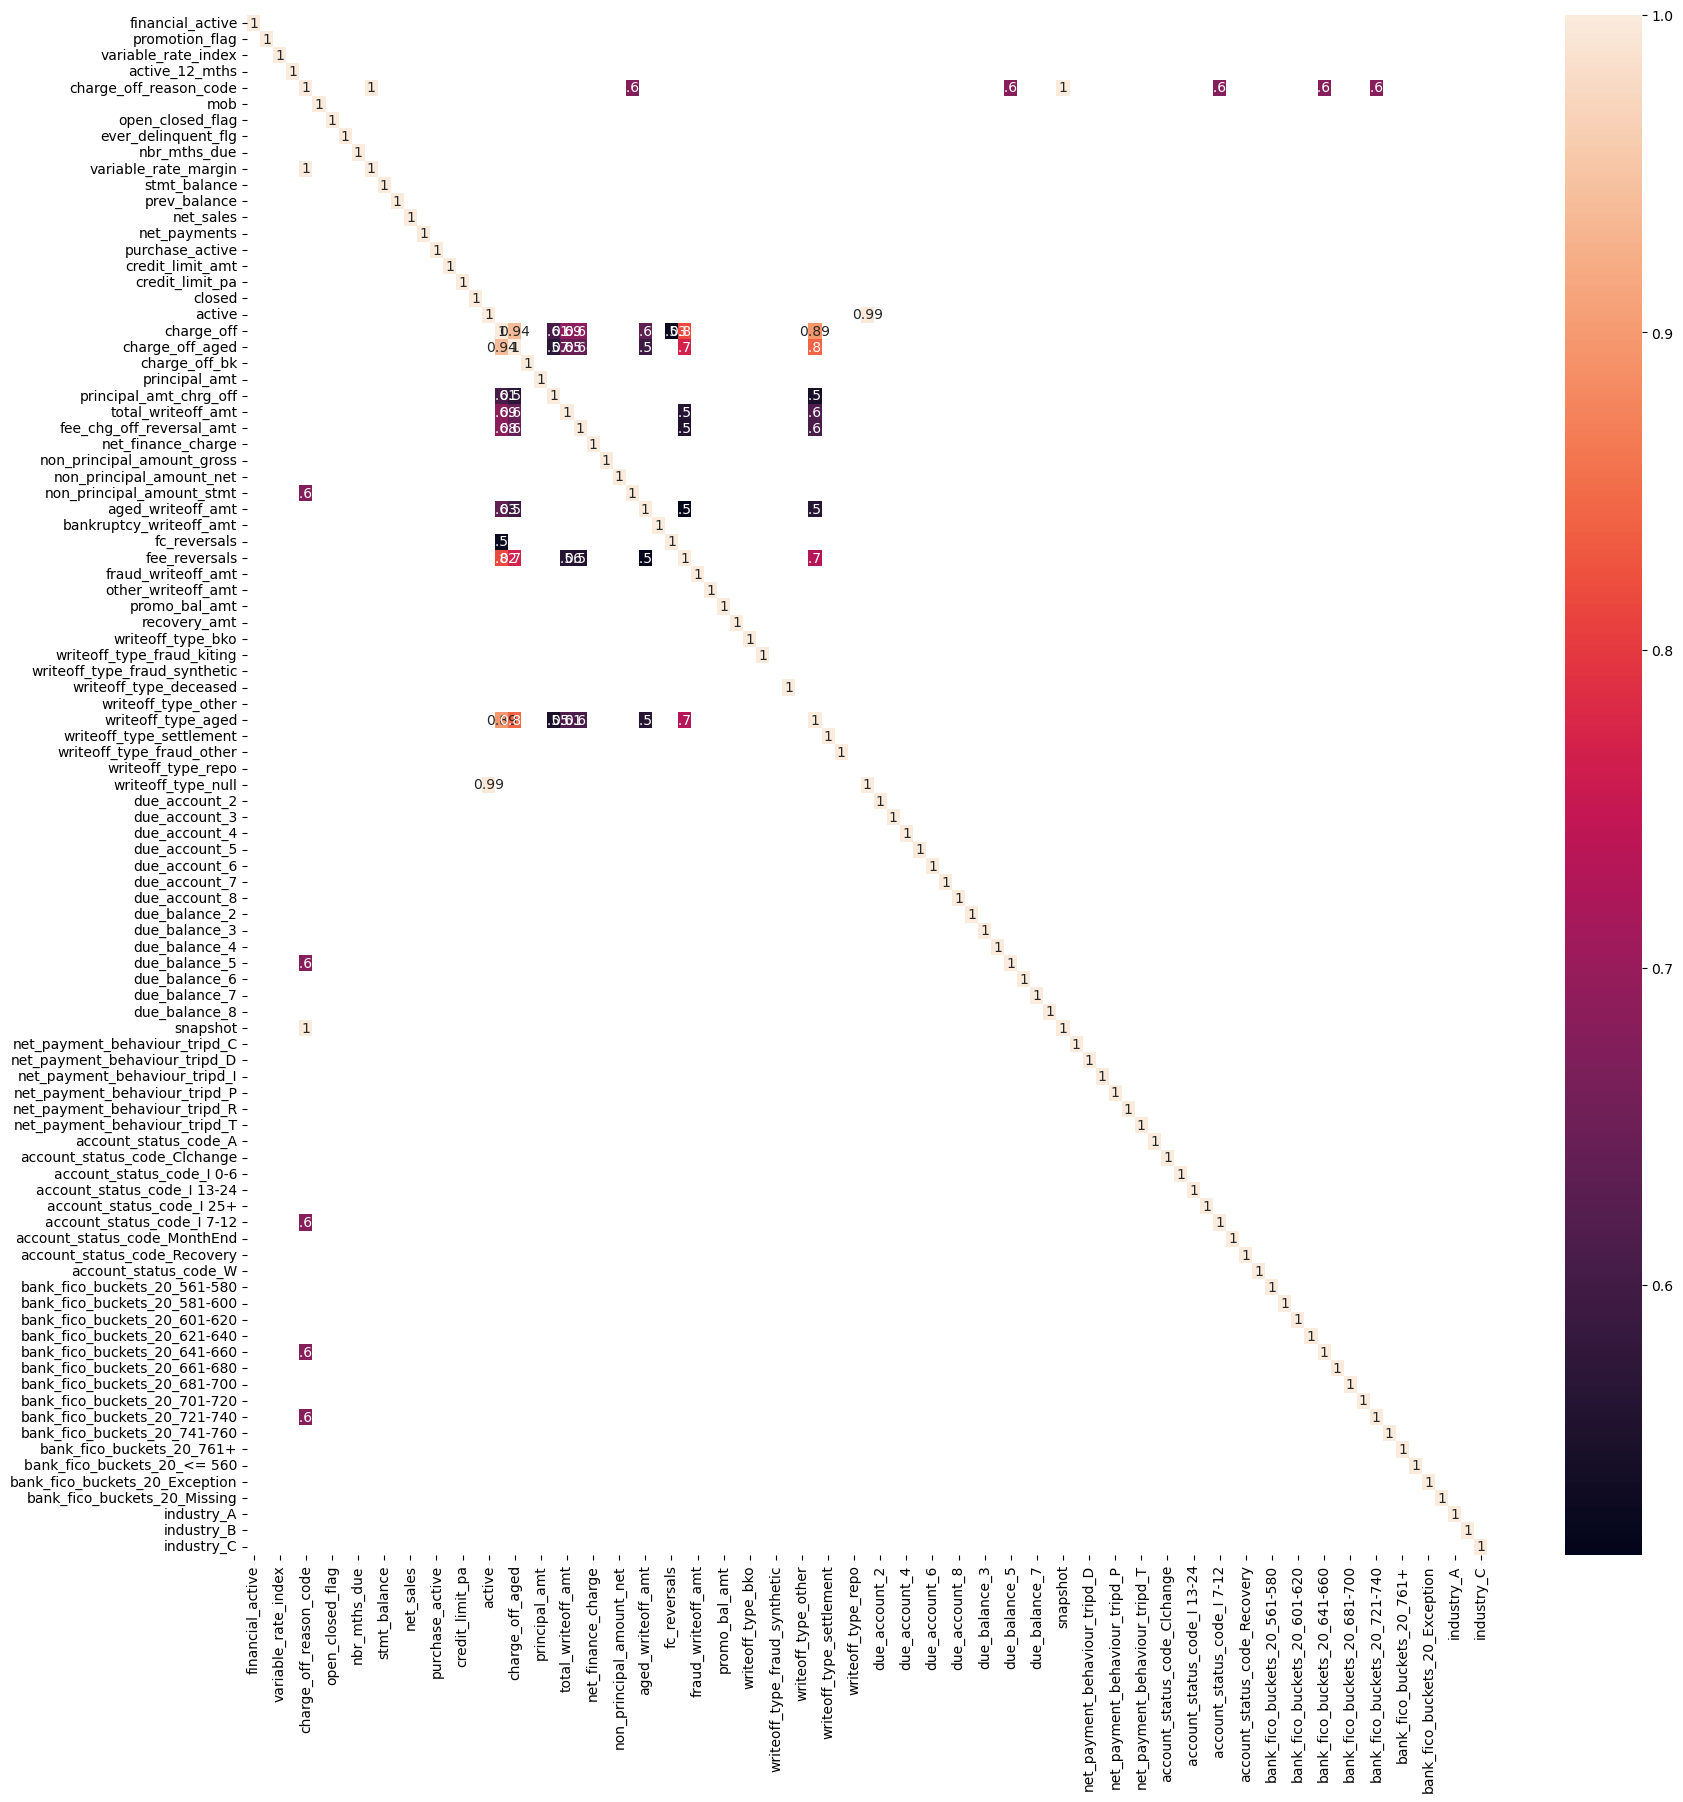

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,20))
cor = df2.corr()
cor1 = cor[cor>0.5]
sns.heatmap(cor1, annot= True)

In [28]:
def find_correlation(df, thresh=0.5):        
    corrMatrix = df.corr()
    corrMatrix.loc[:,:] =  np.tril(corrMatrix, k=-1)

    already_in = set()
    result = []

    for col in corrMatrix:
        perfect_corr = corrMatrix[col][corrMatrix[col] > thresh].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)


    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [29]:
find_correlation(df2)

['non_principal_amount_stmt',
 'due_balance_5',
 'snapshot',
 'account_status_code_I 7-12',
 'bank_fico_buckets_20_641-660',
 'bank_fico_buckets_20_721-740',
 'charge_off_reason_code',
 'active',
 'principal_amt_chrg_off',
 'total_writeoff_amt',
 'fee_chg_off_reversal_amt',
 'aged_writeoff_amt',
 'fc_reversals',
 'fee_reversals',
 'writeoff_type_aged',
 'charge_off']

In [30]:
df2.drop(['non_principal_amount_stmt',
 'due_balance_5',
 'snapshot',
 'account_status_code_I 7-12',
 'bank_fico_buckets_20_641-660',
 'bank_fico_buckets_20_721-740',
 'charge_off_reason_code',
 'active',
 'principal_amt_chrg_off',
 'total_writeoff_amt',
 'fee_chg_off_reversal_amt',
 'aged_writeoff_amt',
 'fc_reversals',
 'fee_reversals',
 'writeoff_type_aged'], axis = 1, inplace=True)

In [31]:
df3 = df2.copy()
df4 = df3.groupby('mth_code').sum()

In [32]:
df4.shape

(24, 80)

In [33]:
df4.head()

,financial_active,promotion_flag,variable_rate_index,active_12_mths,mob,open_closed_flag,ever_delinquent_flg,nbr_mths_due,variable_rate_margin,stmt_balance,prev_balance,net_sales,net_payments,purchase_active,credit_limit_amt,credit_limit_pa,closed,charge_off,charge_off_aged,charge_off_bk,principal_amt,net_finance_charge,non_principal_amount_gross,non_principal_amount_net,bankruptcy_writeoff_amt,fraud_writeoff_amt,other_writeoff_amt,promo_bal_amt,recovery_amt,writeoff_type_bko,writeoff_type_fraud_kiting,writeoff_type_fraud_synthetic,writeoff_type_deceased,writeoff_type_other,writeoff_type_settlement,writeoff_type_fraud_other,writeoff_type_repo,writeoff_type_null,due_account_2,due_account_3,due_account_4,due_account_5,due_account_6,due_account_7,due_account_8,due_balance_2,due_balance_3,due_balance_4,due_balance_6,due_balance_7,due_balance_8,net_payment_behaviour_tripd_C,net_payment_behaviour_tripd_D,net_payment_behaviour_tripd_I,net_payment_behaviour_tripd_P,net_payment_behaviour_tripd_R,net_payment_behaviour_tripd_T,account_status_code_A,account_status_code_Clchange,account_status_code_I 0-6,account_status_code_I 13-24,account_status_code_I 25+,account_status_code_MonthEnd,account_status_code_Recovery,account_status_code_W,bank_fico_buckets_20_561-580,bank_fico_buckets_20_581-600,bank_fico_buckets_20_601-620,bank_fico_buckets_20_621-640,bank_fico_buckets_20_661-680,bank_fico_buckets_20_681-700,bank_fico_buckets_20_701-720,bank_fico_buckets_20_741-760,bank_fico_buckets_20_761+,bank_fico_buckets_20_<= 560,bank_fico_buckets_20_Exception,bank_fico_buckets_20_Missing,industry_A,industry_B,industry_C
mth_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01,13354.0,6989,5642,17658.0,1195759,19706.0,2218.0,2213.0,115236.15,15590401.54,16101387.13,2098223.87,2516590.25,4043.0,89441398.0,23236485.0,0,0,0,0,13904412.51,189977.26,1506694.85,1636746.80,0.00,2525.26,0.00,7182281.48,209.00,0,0,0,0,0,0,4,0,19858,683.0,125.0,77.0,57.0,56.0,60.0,0.0,1031636.44,176053.77,186044.49,115160.23,121627.48,0.0,8.0,920.0,6501.0,7118.0,1742.0,3569.0,13363.0,0.0,2838.0,1399.0,344.0,0.0,3.0,7.0,186.0,272.0,543.0,970.0,1883.0,1789.0,1877.0,1671.0,7098.0,198.0,19.0,70.0,4510.0,11593.0,3755.0
2018-02-01,26454.0,13938,11327,35045.0,2397630,39301.0,4483.0,4677.0,229380.99,30338275.46,31121111.21,4076402.67,5086573.52,7834.0,177549797.0,45299853.0,0,78,70,10,27793364.60,361028.67,2871948.87,3006563.74,8132.46,14872.68,10557.00,14497933.78,2991.99,14,0,0,1,0,2,10,0,39628,1312.0,213.0,175.0,131.0,108.0,93.0,0.0,2216066.10,431785.80,337333.86,227811.14,250905.78,0.0,6.0,1898.0,13404.0,14190.0,3225.0,6983.0,26317.0,0.0,5812.0,3018.0,772.0,4.0,2.0,3.0,342.0,585.0,1097.0,1903.0,3655.0,3920.0,3870.0,3115.0,13964.0,457.0,34.0,114.0,9177.0,23109.0,7420.0
2018-03-01,39247.0,20534,16931,52381.0,3555091,58825.0,6688.0,6528.0,338806.08,45666610.36,46899635.05,6224868.03,7508653.20,11619.0,266065182.0,68699253.0,0,162,137,21,40909374.10,557727.04,4430380.48,4408540.88,44378.97,4079.33,23098.99,21598817.57,5751.83,25,0,0,8,0,6,21,0,59300,1909.0,357.0,234.0,178.0,168.0,174.0,0.0,3168372.74,623633.79,583897.88,331956.97,309386.85,0.0,26.0,2764.0,20327.0,21216.0,4661.0,10468.0,39044.0,0.0,8986.0,4570.0,1181.0,4.0,5.0,24.0,537.0,866.0,1603.0,2901.0,5486.0,5804.0,5711.0,4597.0,21012.0,710.0,42.0,176.0,13376.0,35081.0,11005.0
2018-04-01,51750.0,27279,22594,69167.0,4764651,78262.0,9051.0,8415.0,457466.35,60442784.94,61562082.69,7967601.96,9872436.96,15551.0,355465298.0,90708996.0,0,206,170,34,55040259.79,731933.64,5941284.07,5948033.59,73180.03,23841.85,25082.30,28416944.55,9286.55,22,1,0,15,0,7,8,0,78910,2600.0,482.0,336.0,241.0,203.0,165.0,0.0,4097632.78,913387.17,595314.05,525039.86,548493.68,0.0,49.0,3552.0,27472.0,27998.0,6203.0,13841.0,51668.0,0.0,11712.0,6395.0,1714.0,5.0,10.0,50.0,714.0,1177.0,2147.0,3846.0,7115.0,7834.0,7676.0,6300.0,28030.0,979.0,65.0,277.0,18088.0,46394.0,14633.0
2018-05-01,64073.0,33615,28229,86158.0,5898898,976

In [34]:
df5 = df4.reset_index()